### Multi-layer Perceptron

In [27]:
#import important libaraires
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping


In [28]:
#load tips datasets
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [29]:
#check the shape of dataset
tips.shape

(244, 7)

In [30]:
tips.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [31]:
#check the null values
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Preprocessing

In [32]:
#converting categorical variables to dummy variable
tips= pd.get_dummies(tips, drop_first=True)

#selcting the feature and target
X= tips.drop('tip', axis=1)
y= tips['tip']

#spliting the datse
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

#scaling the data
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

### Build the model

In [33]:
#build the model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#define the callback function
early_stopping = EarlyStopping(patience=5)

#train the model
history= model.fit(X_train, y_train, epochs=100, batch_size=32,
          verbose=1,validation_data=(X_test,y_test),
          callbacks=[early_stopping])

#evaluate the model
loss= model.evaluate(X_test, y_test,verbose=0)
print('Test Loss:', loss)

Epoch 1/100
7/7 [==============================] - 1s 32ms/step - loss: 10.2886 - val_loss: 6.2674
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 8.3420 - val_loss: 4.8411
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 6.7517 - val_loss: 3.7219
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 5.3337 - val_loss: 2.8202
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 4.1910 - val_loss: 2.1491
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 3.2883 - val_loss: 1.7216
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 2.6083 - val_loss: 1.4937
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 2.0952 - val_loss: 1.3741
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 1.8162 - val_loss: 1.2951
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 1.5313 - val_loss: 1.2413
Epoch 11/100
7/7 [==

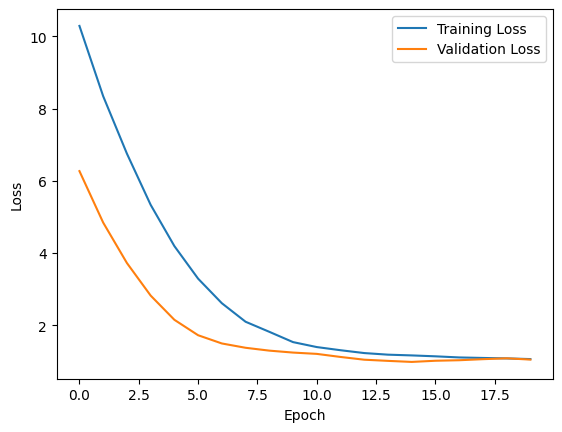

In [34]:
#plotng the traing and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()